In [75]:
# !pip install -r requirment.txt

In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd

## 1- Data Loading

Load the IMDb Movie Reviews dataset.

In [2]:
data = pd.read_csv(r'..\Data\IMDB Dataset.csv')
data

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


Split the dataset into training and testing sets.

In [3]:
# split_point = int(0.8*len(data))
# train_data = data[:split_point]
# test_data = data[split_point:]

In [4]:
# train_data.to_csv('../Data/train.csv' , index=False)
# test_data.to_csv('../Data/test.csv' , index=False)

## 2- Data preproessing

In [5]:
from bs4 import BeautifulSoup as bs
import re
from nltk.corpus import stopwords,wordnet
import nltk
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')
nltk.download('wordnet')


def clean_data(text , stemming = True):
    text = bs(text , "html.parser").get_text()   ## removing HTML tags
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text) ## removing speacial characters
    text = text.lower() ## convert all text to lowercase
    
    text = word_tokenize(text) ### tokenization
    text = [word for word in text if word not in stop_words] ## removing stopwords


    
    ## stemming and lemmatization
    if stemming: ## for stemming parameter is true (function Default)
        stemmer = PorterStemmer()
        stemmed_tokens = [stemmer.stem(token) for token in text]
        stemmed_sentance = " ".join(stemmed_tokens)
        return stemmed_sentance
    else: ## for stemming parameter False
        lemmatizer = WordNetLemmatizer()
        lemma_text = [lemmatizer.lemmatize(word) for word in text]
        lemma_sentance = " ".join(lemma_text)
        return lemma_sentance
    

[nltk_data] Downloading package stopwords to C:\Users\Adam
[nltk_data]     Abdellatif\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Adam
[nltk_data]     Abdellatif\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Adam
[nltk_data]     Abdellatif\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [7]:
data['cleaned_review'] = data['review'].apply(lambda x: clean_data(x, stemming=True))

Data analysis

In [8]:
X = data['cleaned_review']
Y = data['sentiment']

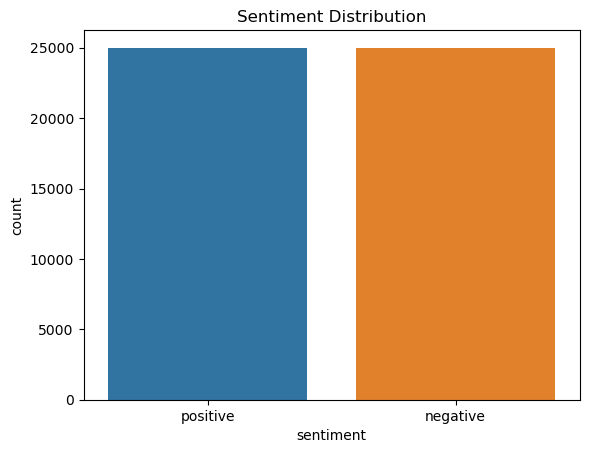

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x='sentiment', data=data)
plt.title('Sentiment Distribution')
plt.show()

In [10]:
print('number of rows for positive class: ' + str((data['sentiment'] == 'positive').sum()))
print('number of rows for negative class: ' + str((data['sentiment'] == 'negative').sum()))

number of rows for positive class: 25000
number of rows for negative class: 25000


## 3- Feature extraction

Bag Of Words (BOW)

In [11]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(max_features=5000)
X_bow = vectorizer.fit_transform(data['cleaned_review'])
X_bow

<50000x5000 sparse matrix of type '<class 'numpy.int64'>'
	with 4079506 stored elements in Compressed Sparse Row format>

Term frequency inverse Document frequancuy  (TFIDF)

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer

transformer = TfidfVectorizer(max_features = 5000)
X_tfidf = transformer.fit_transform(data['cleaned_review'])
X_tfidf

<50000x5000 sparse matrix of type '<class 'numpy.float64'>'
	with 4079506 stored elements in Compressed Sparse Row format>

Word embedding

Traning word2vec model

In [149]:
# import gensim
# from gensim.models import Word2Vec

# # Sample data (replace with your own corpus)
# train_data['toknez'] = [text.split() for text in train_data['cleaned_review']]
# sentences = train_data['toknez'].tolist()
# # Train the model
# model = Word2Vec(sentences, min_count=1, vector_size=100, window=5, workers=4)

# # Save the model
# # model.save("my_word2vec_model")



In [13]:
# loading my trained word2vec model
from gensim.models import Word2Vec
model = Word2Vec.load('../models/my_word2vec_model')

In [14]:
import numpy as np 
def create_word_embeddings(text,model = model):
  words = word_tokenize(text)
  word_vecs = []
  for word in words:
    if word in model.wv:
      word_vecs.append(model.wv[word])
  if len(word_vecs) == 0:
    return np.zeros(model.vector_size)
  return np.mean(word_vecs, axis=0)

In [15]:
data['embedding_review'] = data['cleaned_review'].apply(lambda x: create_word_embeddings(text = x))
data

,review,sentiment,cleaned_review,embedding_review
0,One of the other reviewers has mentioned that ...,positive,one review mention watch 1 oz episod youll hoo...,"[-0.03451701, 0.36159873, -0.16382204, -0.0113..."
1,A wonderful little production. <br /><br />The...,positive,wonder littl product film techniqu unassum old...,"[-0.19957498, 0.034501288, -0.51229215, -0.117..."
2,I thought this was a wonderful way to spend ti...,positive,thought wonder way spend time hot summer weeke...,"[-0.010330736, 0.12378624, -0.37524334, -0.229..."
3,Basically there's a family where a little boy ...,negative,basic there famili littl boy jake think there ...,"[-0.06908627, -0.051492758, -0.096916944, -0.1..."
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,petter mattei love time money visual stun film...,"[-0.07269203, 0.20007403, -0.4887588, 0.122783..."
...,...,...,...,...
49995,I thought this movie did a down right good job...,positive,thought movi right good job wasnt creativ orig...,"[-0.025261205, 0.2105395, -0.25728253, -0.3436..."
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative,bad plot bad dialogu bad act idiot direct anno...,"[-0.1792944, 0.21360892, -0.06766318, -0.61289..."
49997,I am a Catholic taught in parochial elementary...,negative,cathol taught parochi elementari school nun ta...,"[-0.094868876, 0.20532753, -0.10431969, 0.0356..."
49998,I'm going to have to disagree with the previou...,negative,im go disagre previou comment side maltin one ...,"[-0.18918915, 0.23147984, -0.33225378, -0.0382..."


In [16]:
X_word2vec =   pd.DataFrame(data['embedding_review'].to_list())

Glove embedding

In [22]:
import numpy as np

def load_glove_embeddings(glove_file):
    embeddings_index = {}
    with open(glove_file, 'r', encoding='utf-8') as f:
        for line in f:
            values = line.split()
            word = values[0]
            coefs = np.asarray(values[1:], dtype='float32')
            embeddings_index[word] = coefs
    return embeddings_index 

In [23]:
def text_to_vector(text, embeddings_index, embedding_dim=300):
    words = text.split()
    word_vecs = []
    for word in words:
        if word in embeddings_index:
            word_vecs.append(embeddings_index[word])
    if len(word_vecs) == 0:
        return np.zeros(embedding_dim)
    return np.mean(word_vecs, axis=0)


In [24]:
### Reading glove model 
glove_file = '../models/glove.6B.100d.txt' ## replace the this path with your glove model path 
embeddings_index = load_glove_embeddings(glove_file)

data['Glove_embedding_review'] = data['cleaned_review'].apply(lambda x: text_to_vector(x,embeddings_index))
X_glove = pd.DataFrame(data['Glove_embedding_review'].to_list())

In [ ]:
data.to_csv('../Data/trained_data_feature_extraction.csv' , index = False)

## Model Training and Evaluation

In [30]:
from sklearn.preprocessing import OneHotEncoder ,LabelEncoder
## assign  for positive values and 0 for negative
encoder = LabelEncoder()
y = encoder.fit_transform(data['sentiment'])


Split data into train and test datasets

In [31]:
from sklearn.model_selection import train_test_split

## split data into train and test sets 
## use X_bow, X_tfidf, X_word1vec, X_glove as X parameter value for each type of feature extraction
X_train,X_test,y_train,y_test = train_test_split(X_bow,y,test_size=0.2,random_state=0)

print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (40000, 5000)
Number transactions y_train dataset:  (40000,)
Number transactions X_test dataset:  (10000, 5000)
Number transactions y_test dataset:  (10000,)


Evaluation matrices

In [32]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,classification_report,confusion_matrix 

## function for calculate and display all evaluation matrices and confusion matrix 
def evaluate_model(y_test, y_pred):
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    print(classification_report(y_test, y_pred , target_names = ['positive' , 'Negative']))
    print('Confusion Matrix')
    print(confusion_matrix(y_test,y_pred))
    print(f'Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}, F1 Score: {f1}')



In [33]:
from sklearn.metrics import roc_curve, roc_auc_score, auc

def aus_roc(y_test,y_pred_prob):
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    roc_auc = auc(fpr, tpr)
    print('ROC_AUC: ' + str(roc_auc))
    print('---------------------------------------------------------------')


Training and evaluate Machine learning models

In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from tqdm import tqdm

models = [  ## list of used models
    ('Decision Tree', DecisionTreeClassifier(random_state=0)),
    ('Random Forest', RandomForestClassifier(random_state=0)),
    ('Logistic regression', LogisticRegression(random_state=0)),
    # ('SVM', SVC(random_state=0 ,probability=True, kernel='rbf', C=1.0, gamma='scale'))
]

for name, model in tqdm(models): ## loop for train and evaluate all models in previous list 
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    print('Result of: ' + name)
    evaluate_model(y_test,y_pred)
    aus_roc(y_test,y_pred)

 25%|██▌       | 1/4 [01:05<03:15, 65.04s/it]

Result of: Decision Tree
              precision    recall  f1-score   support

    positive       0.72      0.72      0.72      5035
    Negative       0.72      0.71      0.71      4965

    accuracy                           0.72     10000
   macro avg       0.72      0.72      0.72     10000
weighted avg       0.72      0.72      0.72     10000

Confusion Matrix
[[3637 1398]
 [1432 3533]]
Accuracy: 0.717, Precision: 0.7164875278848104, Recall: 0.7115810674723061, F1 Score: 0.7140258690379951
ROC_AUC: 0.7169623311542266
---------------------------------------------------------------


 50%|█████     | 2/4 [04:19<04:41, 140.97s/it]

Result of: Random Forest
              precision    recall  f1-score   support

    positive       0.84      0.85      0.84      5035
    Negative       0.85      0.83      0.84      4965

    accuracy                           0.84     10000
   macro avg       0.84      0.84      0.84     10000
weighted avg       0.84      0.84      0.84     10000

Confusion Matrix
[[4284  751]
 [ 823 4142]]
Accuracy: 0.8426, Precision: 0.8465154302064173, Recall: 0.8342396777442095, F1 Score: 0.8403327246906067
ROC_AUC: 0.842541884552343
---------------------------------------------------------------


 75%|███████▌  | 3/4 [04:22<01:18, 78.29s/it] 

Result of: Logistic regression
              precision    recall  f1-score   support

    positive       0.87      0.86      0.87      5035
    Negative       0.86      0.87      0.87      4965

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000

Confusion Matrix
[[4348  687]
 [ 638 4327]]
Accuracy: 0.8675, Precision: 0.862983645791783, Recall: 0.8715005035246727, F1 Score: 0.867221164445335
ROC_AUC: 0.8675278088626343
---------------------------------------------------------------


Hyperparameters tunning

Grid Search

In [46]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

model = RandomForestClassifier()
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train[:5000], y_train[:5000])

best_params = grid_search.best_params_

In [49]:
print("Best parameters found: ", best_params)
best_model = RandomForestClassifier(**best_params)
best_model.fit(X_train,y_train)
y_pred = best_model.predict(X_test)
evaluate_model(y_test,y_pred)

Best parameters found:  {'max_depth': None, 'min_samples_split': 10, 'n_estimators': 200}
              precision    recall  f1-score   support

    positive       0.85      0.85      0.85      5035
    Negative       0.85      0.85      0.85      4965

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000

Confusion Matrix
[[4283  752]
 [ 752 4213]]
Accuracy: 0.8496, Precision: 0.848539778449144, Recall: 0.848539778449144, F1 Score: 0.848539778449144
---------------------------------------------------------------


In [51]:
import joblib
joblib.dump(best_model, '../models/best_ML_model.pkl')

['../models/best_ML_model.pkl']

Building and Training Deep learning model (LSTM)

In [34]:
from tensorflow.keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words=3000)
tokenizer.fit_on_texts(data['cleaned_review'])
X_seq = tokenizer.texts_to_sequences(data['cleaned_review'])
X_padded = pad_sequences(X_seq , maxlen=300)


X_train_lstm, X_test_lstm, y_train, y_test = train_test_split(X_padded, y, test_size=0.2, random_state=42)
X_train2_lstm, X_val_lstm, y_train2, y_val = train_test_split(X_train_lstm, y_train, test_size=0.4, random_state=42)

In [22]:
from keras.models import Sequential
from keras.layers import Dense,LSTM,SpatialDropout1D,Embedding

lstm_model = Sequential()
lstm_model.add(Embedding(3000, 128, input_length=300))
lstm_model.add(SpatialDropout1D(0.2))
lstm_model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
lstm_model.add(Dense(1, activation='sigmoid'))
lstm_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history = lstm_model.fit(X_train2_lstm, y_train2, epochs=3, batch_size=256, validation_data=(X_val_lstm, y_val))



Epoch 1/3


94/94 [==============================] - 290s 3s/step - loss: 0.4711 - accuracy: 0.7785 - val_loss: 0.3085 - val_accuracy: 0.8713
Epoch 2/3
94/94 [==============================] - 308s 3s/step - loss: 0.2827 - accuracy: 0.8868 - val_loss: 0.3038 - val_accuracy: 0.8761
Epoch 3/3
94/94 [==============================] - 287s 3s/step - loss: 0.2533 - accuracy: 0.9019 - val_loss: 0.3016 - val_accuracy: 0.8748


In [29]:
y_pred = (lstm_model.predict(X_test_lstm) > 0.5).astype('float32')

313/313 [==============================] - 21s 64ms/step


In [27]:
lstm_model.save('LSTM.h5')

Evaluating LSTM Results

In [26]:
from keras.models import load_model
my_model = load_model('../models/LSTM.h5')

In [35]:
y_pred = (my_model.predict(X_test_lstm) > 0.5).astype('float32')

313/313 [==============================] - 19s 58ms/step


In [38]:
print('LSTM')
evaluate_model(y_pred , y_test)
aus_roc(y_pred , y_test)

LSTM
              precision    recall  f1-score   support

    positive       0.89      0.87      0.88      5073
    Negative       0.87      0.88      0.87      4927

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000

Confusion Matrix
[[4394  679]
 [ 567 4360]]
Accuracy: 0.8754, Precision: 0.8652510418733875, Recall: 0.8849198295108586, F1 Score: 0.874974914710014
ROC_AUC: 0.8755369894646743
---------------------------------------------------------------
